<a href="https://colab.research.google.com/github/ankit6102001/PongGame/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn --upgrade --quiet

In [3]:
!pip install pandas-profiling --quiet

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

In [6]:
od.version()


'0.1.20'

In [7]:
dataset_url='https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [8]:
od.download(dataset_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chaubeyankit
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 144MB/s]

In [9]:
import os

In [10]:
data_dir='./weather-dataset-rattle-package'

In [11]:
os.listdir(data_dir)

['weatherAUS.csv']

In [12]:
train_csv = data_dir + '/weatherAUS.csv'

In [13]:
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

In [14]:
!pip install pandas --quiet

In [15]:
import pandas as pd

In [16]:
raw_df= pd.read_csv(train_csv)

In [17]:
raw_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [19]:
raw_df.dropna(subset=['RainToday' , 'RainTomorrow'], inplace=True)

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [21]:
!pip install plotly matplotlib seaborn --quiet

In [22]:
import plotly.express as px

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [25]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [26]:
px.histogram(raw_df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [27]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [28]:
px.scatter(raw_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [29]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [32]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


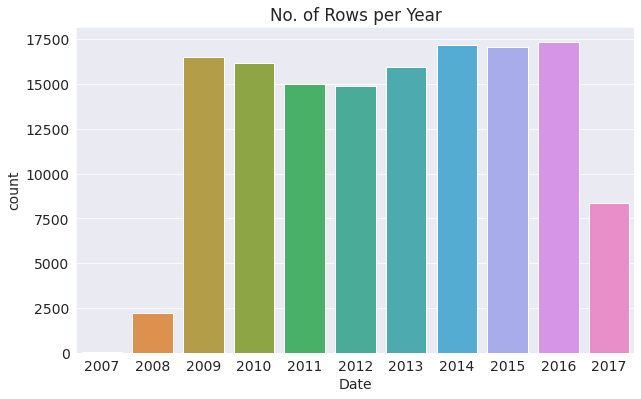

In [33]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [34]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [35]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [36]:
train_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
144548  2014-12-27    Uluru     16.9  ...     31.8         No            No
144549  2014-12-28    Uluru     15.1  ...     34.8         No            No
144550  2014-12-29    Uluru     17.3  ...     35.7         No            No
144551  2014-12-30    Uluru     20.1  ...     37.2         No            No
144552  2014-12-31    Uluru     22.5  ...     37.4         No            No

[97988 rows x 23 columns]

In [37]:
val_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2133    2015-01-01   Albury     11.4  ...     32.7         No            No
2134    2015-01-02   Albury     15.5  ...     38.2         No            No
2135    2015-01-03   Albury     17.1  ...     37.0         No            No
2136    2015-01-04   Albury     26.0  ...     30.9         No            No
2137    2015-01-05   Albury     19.0  ...     32.5         No            No
...            ...      ...      ...  ...      ...        ...           ...
144913  2015-12-27    Uluru     20.5  ...     33.0         No            No
144914  2015-12-28    Uluru     18.0  ...     35.0         No            No
144915  2015-12-29    Uluru     17.5  ...     34.7         No            No
144916  2015-12-30    Uluru     20.0  ...     38.4         No            No
144917  2015-12-31    Uluru     19.3  ...     35.8         No            No

[17089 rows x 23 columns]

In [38]:
test_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2498    2016-01-01   Albury     20.4  ...     36.7         No            No
2499    2016-01-02   Albury     20.9  ...     31.7         No           Yes
2500    2016-01-03   Albury     18.4  ...     19.5        Yes           Yes
2501    2016-01-04   Albury     17.3  ...     21.6        Yes           Yes
2502    2016-01-05   Albury     15.5  ...     22.2        Yes            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[25710 rows x 23 columns]

In [39]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [40]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [41]:
target_col

'RainTomorrow'

In [42]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [43]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [44]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [45]:
train_inputs

Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm  RainToday
0        Albury     13.4     22.9  ...     16.9     21.8         No
1        Albury      7.4     25.1  ...     17.2     24.3         No
2        Albury     12.9     25.7  ...     21.0     23.2         No
3        Albury      9.2     28.0  ...     18.1     26.5         No
4        Albury     17.5     32.3  ...     17.8     29.7         No
...         ...      ...      ...  ...      ...      ...        ...
144548    Uluru     16.9     33.2  ...     23.7     31.8         No
144549    Uluru     15.1     36.8  ...     28.9     34.8         No
144550    Uluru     17.3     37.8  ...     29.7     35.7         No
144551    Uluru     20.1     38.5  ...     29.8     37.2         No
144552    Uluru     22.5     39.6  ...     30.1     37.4         No

[97988 rows x 21 columns]

In [46]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [47]:
import numpy as np

In [48]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [49]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97674.000000  97801.000000  ...  61966.000000  97414.000000
mean      12.007831     23.022202  ...      4.410677     16.835126
std        6.347175      6.984397  ...      2.693370      6.404586
min       -8.500000     -4.100000  ...      0.000000     -5.900000
25%        7.500000     17.900000  ...      2.000000     12.200000
50%       11.800000     22.400000  ...      5.000000     16.600000
75%       16.600000     27.900000  ...      7.000000     21.400000
max       33.900000     48.100000  ...      9.000000     40.200000

[8 rows x 15 columns]

In [50]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(strategy = 'mean')

In [53]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

In [54]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

In [55]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [56]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

In [57]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [58]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

In [59]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm        Temp9am
count  140319.000000  140480.00000  ...  84693.000000  140131.000000
mean       12.184824      23.23512  ...      4.499250      16.987066
std         6.403879       7.11450  ...      2.719752       6.496012
min        -8.500000      -4.80000  ...      0.000000      -7.200000
25%         7.600000      17.90000  ...      2.000000      12.300000
50%        12.000000      22.60000  ...      5.000000      16.700000
75%        16.800000      28.30000  ...      7.000000      21.600000
max        33.900000      48.10000  ...      9.000000      40.200000

[8 rows x 15 columns]

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [63]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2]

In [64]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2]

In [65]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [66]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.493693      0.507089
std        0.149458      0.131904  ...      0.238028      0.134722
min        0.000000      0.013233  ...      0.000000      0.027426
25%        0.377358      0.429112  ...      0.333333      0.409283
50%        0.478774      0.514178  ...      0.499917      0.502110
75%        0.591981      0.618147  ...      0.666667      0.601266
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 15 columns]

In [67]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.493693      0.507089
std        0.149458      0.131904  ...      0.238028      0.134722
min        0.000000      0.013233  ...      0.000000      0.027426
25%        0.377358      0.429112  ...      0.333333      0.409283
50%        0.478774      0.514178  ...      0.499917      0.502110
75%        0.591981      0.618147  ...      0.666667      0.601266
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 15 columns]

In [68]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [71]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [72]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [73]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [74]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

In [75]:
pd.set_option('display.max_columns', None)

In [76]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532     36.7        No                0.0   
2499    0.888889  0.888889  0.675105     31.7        No                0.0   
2500    0.888889  0.888889  0.611814     19.5       Yes                0.0   
2501    0.888889  0.888889  0.556962     21.6       Yes                0.0   
2502    0.888889  0.888889  0.514768     22.2       Yes                0.0   
...          ...       ...       ...      ...       ...                ...   
145454  0.492351  0.499917  0.350211     20.9        No                0.0   
145455  0.492351  0.499917  0.364979     22.4        No                0.0   
145456  0.492351  0.499917  0.381857     24.5        No                0.0   
145457  0.492351  0.499917  0.415612     26.1        No                0.0   
145458  0.333333  0.222222  0.470464     26.0        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
...          

In [77]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [78]:
!pip install pyarrow --quiet

In [79]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [80]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 41.1 ms, sys: 1.09 ms, total: 42.1 ms
Wall time: 49.2 ms


In [81]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 320 ms, sys: 222 ms, total: 542 ms
Wall time: 368 ms


In [82]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [83]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134     Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135     Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136     Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137     Albury  0.648585  0.756144       0.0     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0     0.037741  0.526244   
144914    Uluru  0.625000  0.778828       0.0     0.037741  0.526244   
144915    Uluru  0.613208  0.792060       0.0     0.037741  0.526244   
144916    Uluru  0.672170  0.826087       0.0     0.037741  0.526244   
144917    Uluru  0.655660  0.797732       0.0     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW       0.186047        ESE          W      0.053846   
2134            NE       0.387597        ESE        ESE      0.069231   
2135           NNE       0.325581         NE          N      0.153846   
2136           NNE       0.271318        ESE          W      0.053846   
2137             E       0.209302        SSE         SE      0.053846   
...            ...            ...        ...        ...           ...   
144913           E       0.356589        ESE          E      0.269231   
144914         ESE       0.372093          E        ESE      0.230769   
144915           E       0.387597          E         SE      0.253846   
144916           E       0.410853          E        SSE      0.153846   
144917          SE       0.387597        ESE          S      0.153846   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.126437         0.45         0.14     0.545455       0.5424   
2134        0.103448         0.45         0.12     0.586777       0.5648   
2135        0.229885         0.35         0.19     0.618182       0.5632   
2136        0.080460         0.46         0.37     0.547107       0.5600   
2137        0.103448         0.60         0.34     0.609917       0.6016   
...              ...          ...          ...          ...          ...   
144913      0.229885         0.23         0.12     0.540496       0.5280   
144914      0.356322         0.17         0.07     0.565289       0.5408   
144915      0.252874         0.12         0.07     0.530579       0.4864   
144916      0.195402         0.12         0.12     0.441322       0.4080   
144917      0.321839         0.46         0.18     0.442975       0.4256   

        Cloud9am  Cloud3pm   Temp9am  Temp3pm RainToday  Location_Adelaide  \
2133    0.492351  0.499917  0.594937     32.7        No                0.0   
2134    0.492351  0.499917  0.691983     38.2        No                0.0   
2135    0.492351  0.499917  0.767932     37.0        No                0.0   
2136    0.888889  0.555556  0.729958     30.9        No                0.0   
2137    0.888889  0.499917  0.691983     32.5        No                0.0   
...          ...       ...       ...      ...       ...                ...   
144913  0.492351  0.499917  0.664557     33.0        No                0.0   
144914  0.492351  0.499917  0.715190     35.0        No                0.0   
144915  0.492351  0.499917  0.744726     34.7        No                0.0   
144916  0.492351  0.111111  0.812236     38.4        No                0.0   
144917  0.492351  0.499917  0.696203     35.8        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2133                0.0              1.0                    0.0   
2134                0.0              1.0                    0.0   
2135                0.0              1.0                    0.0   
2136                0.0              1.0                    0.0   
2137                0.0              1.0                    0.0   
...          

In [84]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression(solver='liblinear')

In [87]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [88]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [89]:
print(model.coef_.tolist())

[[0.9829272985765378, -1.6136822077921629, 3.2569451328900922, 0.7391772272261374, -1.665730067365724, 6.712782346582703, -0.8945848254028183, -1.4786777149489574, 0.5085762943945592, 5.668985885134319, 5.7512710157968305, -9.442234740198247, -0.15422870180288917, 1.2692578677045214, 0.9609387600221121, 0.5968095184788006, -0.5433599933400493, 0.48409445642112614, 0.012646371301369185, 0.3420937583172522, -0.3502912727984089, 0.18144823211158378, 0.4258617593285847, -0.004902265798005033, 0.015432475688749822, 0.25380114477159266, -0.018375820646252074, -0.03048369335905766, -0.46729041060947873, -0.1441966650545995, -0.5908198550000147, -0.7446331726196194, -0.24989076701188495, -0.32868637877351403, -0.5709379172058887, 0.08019115981179582, 0.014039302320957656, 0.05995223838401963, -0.8771230773722085, -0.441465682398046, 0.011834632183502208, -0.45949004429924983, -0.4601851982479873, -0.07469554670856815, 0.1945916834015849, 0.4456783445702781, 0.6073735657904817, 0.43039861820934

In [90]:
print(model.intercept_)

[-2.36394067]


In [91]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [92]:
train_preds = model.predict(X_train)

In [93]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [94]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [95]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93950704, 0.06049296],
       [0.94333134, 0.05666866],
       [0.95980416, 0.04019584],
       ...,
       [0.98729985, 0.01270015],
       [0.98358003, 0.01641997],
       [0.87598858, 0.12401142]])

In [96]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(train_targets, train_preds)

0.8519002326815528

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

In [101]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


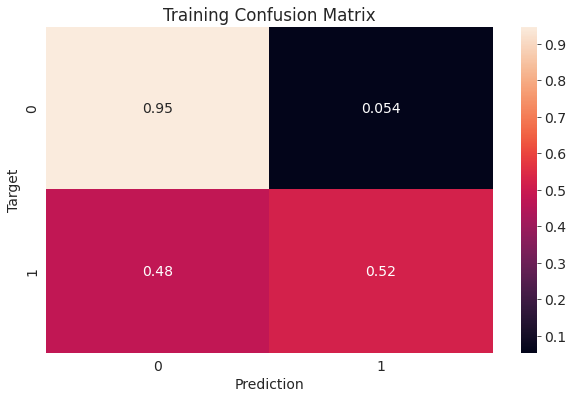

In [102]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.41%


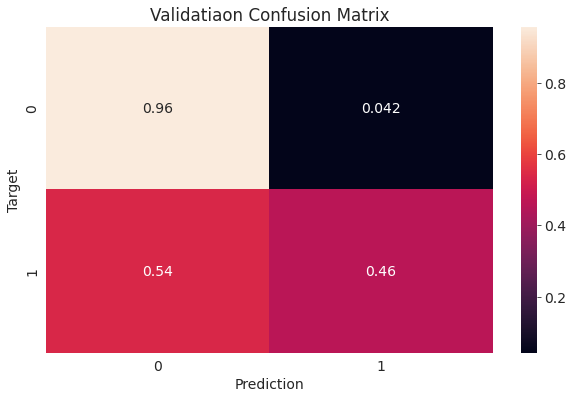

In [103]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 85.41%


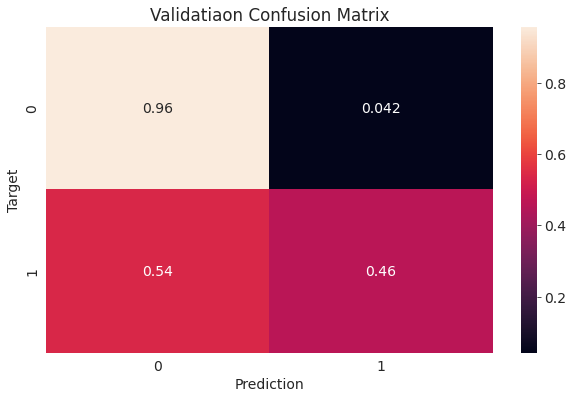

In [104]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.25%


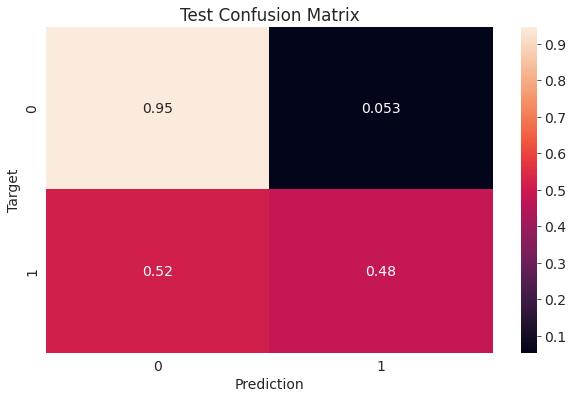

In [105]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [106]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [107]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [108]:
accuracy_score(test_targets, random_guess(X_test))

0.4996888370283936

In [109]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [110]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [111]:
new_input_df = pd.DataFrame([new_input])

In [112]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [113]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [114]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0            0.0             0.0

In [115]:
prediction = model.predict(X_new_input)[0]

In [116]:
prediction

'Yes'

In [117]:
prob = model.predict_proba(X_new_input)[0]

In [118]:
prob

array([0.48885322, 0.51114678])